# Convolutional neural network
This part will show the code of the convolutional network 

In [1]:
##from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pillow
!pip install pydicom


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 908.9 kB/s eta 0:00:0000:0100:01


In [2]:
!pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.6 MB/s eta 0:00:0000:0100:01


In [3]:
from PIL import Image
import numpy as np
import pandas as pd
import pydicom
import os

In [4]:
def get_names(path):
    names = []
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            _, ext = os.path.splitext(filename)
            if ext in ['.dcm']:
                names.append(filename)
    
    return names

In [5]:
def convert_dcm_jpg(name):
    
    im = pydicom.dcmread('/home/alejandrodf1/Documents/theory_project/manifest-1592488683281/C4KC-KiTS/KiTS-00000/06-29-2003-NA-threephaseabdomen-41748/10.000000-late-10134/'+name)

    im = im.pixel_array.astype(float)

    rescaled_image = (np.maximum(im,0)/im.max())*255 # float pixels
    final_image = np.uint8(rescaled_image) # integers pixels

    final_image = Image.fromarray(final_image)

    return final_image

In [6]:
names = get_names('/home/alejandrodf1/Documents/theory_project/manifest-1592488683281/C4KC-KiTS/KiTS-00000/06-29-2003-NA-threephaseabdomen-41748/10.000000-late-10134')

In [7]:
len(names)

154

In [8]:
for name in names:
    image = convert_dcm_jpg(name)
    image.save(name+'.png')

In [19]:
dirr = '/content/drive/MyDrive/manifest-1592488683281/C4KC-KiTS/KiTS-00001/11-13-2003-NA-threephaseabdomen-49621/300.000000-Segmentation-44409/1-1.dcm'
ds = pydicom.dcmread(dirr)


In [ ]:
#!pip install pydicom
#!pip install opencv-python

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import os  #directory operations
import pandas as pd  #data nalysis
import numpy as np
import pydicom  #manage dicom files


In [5]:
data_dir = '/home/alejandrodf1/Documents/theory_project/manifest-1592488683281/C4KC-KiTS/KiTS-00000/06-29-2003-NA-threephaseabdomen-41748/10.000000-late-10134/'
patients = os.listdir(data_dir)
print(patients)
#labels_df = pd.read_csv('/content/drive/MyDrive/manifest-1592488683281/clinical.csv', index_col=0)
#labels_df.head()

['1-129.dcm', '1-086.dcm', '1-026.dcm', '1-077.dcm', '1-046.dcm', '1-047.dcm', '1-072.dcm', '1-033.dcm', '1-012.dcm', '1-090.dcm', '1-076.dcm', '1-153.dcm', '1-041.dcm', '1-113.dcm', '1-054.dcm', '1-058.dcm', '1-010.dcm', '1-127.dcm', '1-099.dcm', '1-051.dcm', '1-075.dcm', '1-068.dcm', '1-130.dcm', '1-062.dcm', '1-009.dcm', '1-019.dcm', '1-008.dcm', '1-035.dcm', '1-057.dcm', '1-018.dcm', '1-065.dcm', '1-013.dcm', '1-004.dcm', '1-119.dcm', '1-043.dcm', '1-055.dcm', '1-079.dcm', '1-140.dcm', '1-142.dcm', '1-106.dcm', '1-144.dcm', '1-074.dcm', '1-005.dcm', '1-122.dcm', '1-148.dcm', '1-132.dcm', '1-070.dcm', '1-149.dcm', '1-125.dcm', '1-094.dcm', '1-044.dcm', '1-154.dcm', '1-128.dcm', '1-037.dcm', '1-111.dcm', '1-131.dcm', '1-088.dcm', '1-136.dcm', '1-103.dcm', '1-143.dcm', '1-067.dcm', '1-007.dcm', '1-032.dcm', '1-071.dcm', '1-114.dcm', '1-048.dcm', '1-063.dcm', '1-091.dcm', '1-039.dcm', '1-045.dcm', '1-089.dcm', '1-145.dcm', '1-120.dcm', '1-116.dcm', '1-093.dcm', '1-121.dcm', '1-014.dcm'

In [6]:
for patient in patients[:1]:
    #label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices =[pydicom.read_file(path + '/'+s) for s in os.listdir(path)]  #obtengo todas las imagenes dicom
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))



NotADirectoryError: [Errno 20] Not a directory: '/home/alejandrodf1/Documents/theory_project/manifest-1592488683281/C4KC-KiTS/KiTS-00000/06-29-2003-NA-threephaseabdomen-41748/10.000000-late-10134/1-129.dcm'

In [ ]:
labels_df.dtypes

age_at_nephrectomy                                             int64
gender                                                        object
body_mass_index                                              float64
comorbidities__myocardial_infarction                            bool
comorbidities__congestive_heart_failure                         bool
comorbidities__peripheral_vascular_disease                      bool
comorbidities__cerebrovascular_disease                          bool
comorbidities__dementia                                         bool
comorbidities__copd                                             bool
comorbidities__connective_tissue_disease                        bool
comorbidities__peptic_ulcer_disease                             bool
comorbidities__uncomplicated_diabetes_mellitus                  bool
comorbidities__diabetes_mellitus_with_end_organ_damage          bool
comorbidities__chronic_kidney_disease                           bool
comorbidities__hemiplegia_from_str

In [ ]:
dataset.shape
dataset.tail(30)

,patient_id,age_at_nephrectomy,gender,body_mass_index,comorbidities__myocardial_infarction,comorbidities__congestive_heart_failure,comorbidities__peripheral_vascular_disease,comorbidities__cerebrovascular_disease,comorbidities__dementia,comorbidities__copd,...,cytoreductive,positive_resection_margins,last_preop_egfr,last_preop_egfr_days_before_surgery,first_postop_egfr,first_postop_egfr_days_after_surgery,last_postop_egfr,last_postop_egfr_days_after_surgery,vital_status,vital_days_after_surgery
180,KiTS-00180,82,male,24.53,False,False,False,False,False,False,...,True,False,57,16.0,40,103.0,42,1678.0,dead,2000
181,KiTS-00181,45,male,23.64,False,False,False,False,False,False,...,False,False,>=90,4.0,NaN,NaN,NaN,NaN,dead,177
182,KiTS-00182,65,female,43.35,False,False,False,False,False,False,...,False,False,>=90,62.0,NaN,NaN,NaN,NaN,censored,1226
183,KiTS-00183,63,male,27.65,False,False,False,False,False,False,...,False,False,NaN,NaN,44,1083.0,44,1083.0,censored,1092
184,KiTS-00184,38,male,38.13,False,False,False,False,False,False,...,True,False,75,45.0,46,76.0,5,229.0,censored,894
185,KiTS-00185,65,male,34.12,False,False,False,False,False,False,...,False,False,58,25.0,NaN,NaN,NaN,NaN,censored,0
186,KiTS-00186,56,male,21.77,False,False,False,False,False,False,...,False,False,>=90,26.0,76,698.0,76,698.0,censored,698
187,KiTS-00187,37,female,26.42,False,False,False,False,False,False,...,False,False,NaN,NaN,>=90,126.0,>=90,640.0,censored,980
188,KiTS-00188,68,female,23.12,False,False,False,False,False,False,...,False,False,80,5.0,80,92.0,73,1367.0,censored,1529
189,KiTS-00189,41,male,22.36,False,False,False,False,False,False,...,True,False,>=90,13.0,62,89.0,35,385.0,dead,391


In [ ]:
dirrec = '/datasets/data/metadata.csv'
data_reading = pd.read_csv(dirrec, index_col=0)
data_reading.head(5)


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.2.276.0.7230010.3.1.3.0.74366.1588583084.764537,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,40,82 MB,.\C4KC-KiTS\KiTS-00000\06-29-2003-NA-threephas...,2022-06-28T15:44:47.459
1.3.6.1.4.1.14519.5.2.1.6919.4624.313514201353787659031503464798,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,noncontrast,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,93,49,10 MB,.\C4KC-KiTS\KiTS-00000\06-29-2003-NA-threephas...,2022-06-28T15:45:26.965
1.2.276.0.7230010.3.1.3.0.74416.1588583149.544409,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00001,1.3.6.1.4.1.14519.5.2.1.6919.4624.138299679445...,threephaseabdomen,11-13-2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,40,22 MB,.\C4KC-KiTS\KiTS-00001\11-13-2003-NA-threephas...,2022-06-28T15:46:01.505
1.3.6.1.4.1.14519.5.2.1.6919.4624.319956314021047038498210610134,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,late,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,154,81,33 MB,.\C4KC-KiTS\KiTS-00000\06-29-2003-NA-threephas...,2022-06-28T15:47:15.449
1.3.6.1.4.1.14519.5.2.1.6919.4624.241474384128770482476403302453,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00001,1.3.6.1.4.1.14519.5.2.1.6919.4624.138299679445...,threephaseabdomen,11-13-2003,noncontrast,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,102,53,85 MB,.\C4KC-KiTS\KiTS-00001\11-13-2003-NA-threephas...,2022-06-28T15:48:48.813


In [ ]:
data_reading.dtypes

Series UID               object
Collection              float64
3rd Party Analysis       object
Data Description URI     object
Subject ID               object
Study UID                object
Study Description        object
Study Date               object
Series Description       object
Manufacturer             object
Modality                 object
SOP Class Name           object
SOP Class UID             int64
Number of Images          int64
File Size                object
File Location            object
Download Timestamp       object
dtype: object

In [ ]:
!pip install pydicom

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01.dcm'
ds = pydicom.dcmread(dirr)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6919.4624.302693755253199226108824913410
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.

In [ ]:
import matplotlib as plt
from matplotlib import pyplot


In [ ]:
pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

NameError: ignored

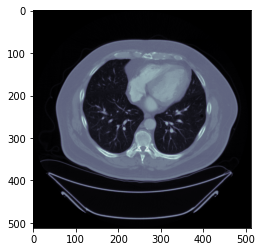

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01-arterial.dcm'
ds = pydicom.dcmread(dirr)

pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

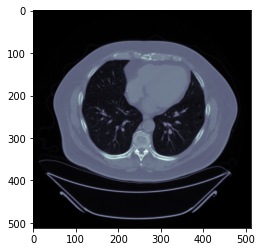

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01-late.dcm'
ds = pydicom.dcmread(dirr)

pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

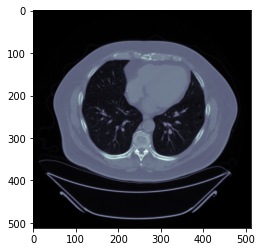

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01-late.dcm'
ds = pydicom.dcmread(dirr)

pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-1.dcm'
ds = pydicom.dcmread(dirr)

image = np.reshape(ds,(1,512,512))
pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

ValueError: cannot reshape array of size 1 into shape (1,512,512)

In [ ]:
#ite = datagen.flow_from_directory("Car Images", batch_size=1)
for i in range(9):

    # define subplot
    plt.subplot(330 + 1 + i)

    # generate batch of images
    batch = ds.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    image = np.reshape(256,256,3)

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplot'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=910d14ef-cedd-454b-aa64-d4ae003c9997' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>